In [51]:
import pandas as pd

In [52]:
df = pd.read_csv("diabetes.csv")

In [53]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [55]:
df.shape

(768, 9)

In [56]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [58]:
df["Pregnancies"].nunique()

17

In [59]:
### convert pregnancies to categorical

df["Pregnancies"] = df["Pregnancies"].astype("category")

In [60]:
df.dtypes

Pregnancies                 category
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
dtype: object

In [61]:
### numerical variable first

df_num = df.select_dtypes(include=["int64", "float64"])
df_cat = df.select_dtypes(exclude=["int64", "float64"])

In [62]:
df_num.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [63]:
df_cat.head()

,Pregnancies
0,6
1,1
2,8
3,1
4,0


In [64]:
df_num = df_num.drop("Outcome", axis=1)

In [65]:
df_num.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [66]:
df_num.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [67]:
import seaborn as sns

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

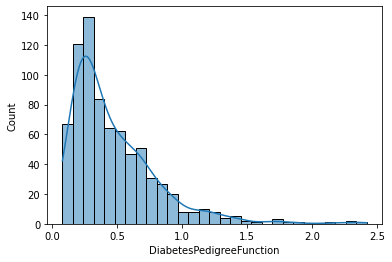

In [68]:
sns.histplot(df_num["DiabetesPedigreeFunction"], kde=True)

In [69]:
..p

SyntaxError: invalid syntax (<ipython-input-69-b64eb5e79d62>, line 1)

In [71]:
### transformation 
import numpy as np

#df_num["Insulin"] = np.log1p(df_num["Insulin"])
df_num["Insulin"] = np.sqrt(df_num["Insulin"])


#from scipy import stats

#df_num["Insulin"] = stats.boxcox(df_num["Insulin"])

In [72]:
df_num["DiabetesPedigreeFunction"] = np.sqrt(df_num["DiabetesPedigreeFunction"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

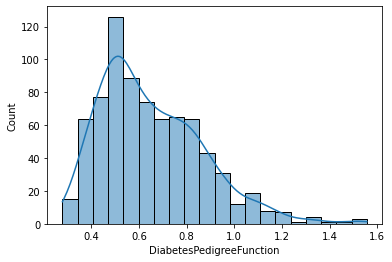

In [73]:
sns.histplot(df_num["DiabetesPedigreeFunction"], kde=True)

In [74]:
df_num.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0.000000,33.6,0.791833,50
1,85,66,29,0.000000,26.6,0.592453,31
2,183,64,0,0.000000,23.3,0.819756,32
3,89,66,23,9.695360,28.1,0.408656,21
4,137,40,35,12.961481,43.1,1.512614,33


In [76]:
df_num.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,6.030394,31.992578,0.651989,33.240885
std,31.972618,19.355807,15.952218,6.594729,7.884160,0.216445,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.279285,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.493710,24.000000
50%,117.000000,72.000000,23.000000,5.521010,32.000000,0.610327,29.000000
75%,140.250000,80.000000,32.000000,11.280498,36.600000,0.791360,41.000000
max,199.000000,122.000000,99.000000,29.086079,67.100000,1.555635,81.000000


In [77]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()
df_num_sc = mn.fit_transform(df_num)

In [78]:
df_num_df = pd.DataFrame(df_num_sc, index = df_num.index, columns=df_num.columns)

In [79]:
df_num_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.607510,0.566438,0.207439,0.207329,0.476790,0.292007,0.204015
std,0.160666,0.158654,0.161134,0.226731,0.117499,0.169581,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.497487,0.508197,0.000000,0.000000,0.406855,0.167999,0.050000
50%,0.587940,0.590164,0.232323,0.189816,0.476900,0.259366,0.133333
75%,0.704774,0.655738,0.323232,0.387832,0.545455,0.401202,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
### categorical variable

df_cat_dum = pd.get_dummies(df_cat)

In [81]:
df_cat_dum.head()

,Pregnancies_0,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
df_cat_dum.shape

(768, 17)

In [83]:
df_final = pd.concat([df_num_df, df_cat_dum],axis=1)

In [84]:
df_final.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_0,Pregnancies_1,Pregnancies_2,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.401574,0.483333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.245362,0.166667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.423451,0.183333,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.447236,0.540984,0.232323,0.333333,0.418778,0.101361,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.688442,0.327869,0.353535,0.445625,0.642325,0.966294,0.200000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
X = df_final
y = df["Outcome"]

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=4)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [89]:
pred = lr.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
accuracy_score(y_test, pred)

0.8017241379310345

In [93]:
accuracy_score(y_train, lr.predict(X_train))

0.7760736196319018

In [94]:
confusion_matrix(y_test, pred)

array([[70,  6],
       [17, 23]])

In [96]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        76
           1       0.79      0.57      0.67        40

    accuracy                           0.80       116
   macro avg       0.80      0.75      0.76       116
weighted avg       0.80      0.80      0.79       116

